<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/chipsff_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:13
🔁 Restarting kernel...


In [1]:
%%time
!conda install alignn chgnet matgl pytorch torchvision torchaudio pytorch-cuda -c pytorch -c nvidia -y --quiet

Channels:
 - pytorch
 - nvidia
 - conda-forge
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - alignn
    - chgnet
    - matgl
    - pytorch
    - pytorch-cuda
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |       2_kmp_llvm           6 KB  conda-forge
    absl-py-2.1.0              |     pyhd8ed1ab_1         105 KB  conda-forge
    alignn-2024.10.30          |     pyhd8ed1ab_0          76 KB  conda-forge
    annotated-types-0.7.0      |     pyhd8ed1ab_1          18 KB  conda-forge
    ase-3.23.0                 |     pyhd8ed1ab_0         1.8 MB  conda-forge
    astunparse-1.6.3           |     pyhd8ed1ab_2          18 KB  conda-forge
    babel-2.16.0               |     pyhd8ed1ab_1         6.2 MB  conda-forge
    blinker-1.9

In [2]:
!pip install  -q git+https://github.com/usnistgov/chipsff.git@develop

  Preparing metadata (setup.py) ... done


In [3]:
!git clone https://github.com/ACEsuit/mace.git
!pip install -q ./mace

Cloning into 'mace'...
remote: Enumerating objects: 9215, done.
remote: Counting objects: 100% (4840/4840), done.
remote: Compressing objects: 100% (1197/1197), done.
remote: Total 9215 (delta 4002), reused 4242 (delta 3626), pack-reused 4375 (from 1)
Receiving objects: 100% (9215/9215), 103.83 MiB | 32.32 MiB/s, done.
Resolving deltas: 100% (6757/6757), done.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.7/387.7 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.8/448.8 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 9.2 MB/s eta 0:00:00


In [4]:
from chipsff.scaling_analyzer import ScalingAnalyzer
from chipsff.config import CHIPSFFConfig
config = CHIPSFFConfig(
    calculator_type="alignn_ff",
    scaling_numbers=[1,2,3],

)
analyzer = ScalingAnalyzer(
    config=config,

)
analyzer.run()

Logging initialized. Output directory: scaling_analysis_Cu
Starting scaling test...
Scaling test: Supercell size 1


DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
dir_path /usr/local/lib/python3.10/site-packages/alignn/ff/v12.2.2024_dft_3d_307k


100%|██████████| 549k/549k [00:00<00:00, 1.29MiB/s]
/usr/local/lib/python3.10/site-packages/alignn/ff/ff.py:295: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /home/conda/feedstock_root/build_artifacts/libtorch_1718580401398/work/torch/csrc/utils/tensor_new.cpp:274.)
  torch.tensor(atoms.cell)


Calculator alignn_ff: Time taken 0.6327 s for 1 atoms
Scaling test: Supercell size 2
dir_path /usr/local/lib/python3.10/site-packages/alignn/ff/v12.2.2024_dft_3d_307k
Calculator alignn_ff: Time taken 0.0907 s for 8 atoms
Scaling test: Supercell size 3
dir_path /usr/local/lib/python3.10/site-packages/alignn/ff/v12.2.2024_dft_3d_307k
Calculator alignn_ff: Time taken 0.2131 s for 27 atoms
Scaling test plot saved to scaling_analysis_Cu/scaling_test.png
Job info saved to 'scaling_analysis_Cu/scaling_analysis_job_info.json'


In [7]:
analyzer.job_info['scaling_test']

{'natoms': [1, 8, 27],
 'times': {'alignn_ff': [0.6327011585235596,
   0.09072136878967285,
   0.2130897045135498]}}

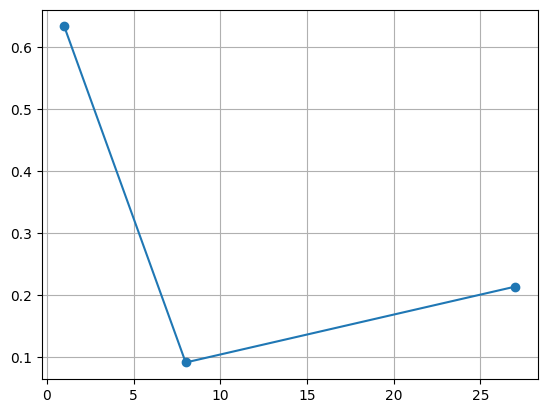

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(analyzer.job_info['scaling_test']['natoms'],analyzer.job_info['scaling_test']['times']['alignn_ff'],'o-')
plt.grid()